# HRF Mark 1

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hrf = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_hrf.jpg')
hrf_rgb = cv2.cvtColor(hrf, cv2.COLOR_BGR2RGB)
hrf_res = cv2.resize(hrf_rgb, (int(hrf_rgb.shape[1]*50/100), int(hrf_rgb.shape[0]*50/100)), cv2.INTER_AREA)

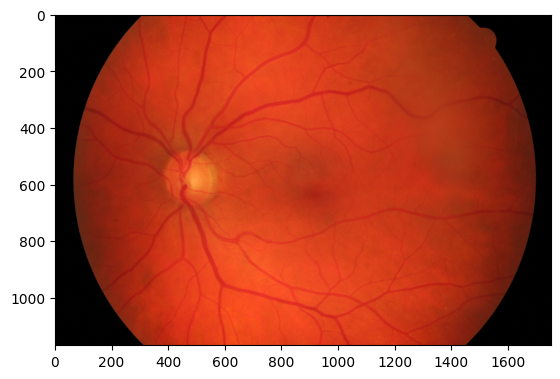

In [3]:
plt.imshow(hrf_res)

In [4]:
wlim = 135
hrf_gray = cv2.cvtColor(hrf_res.copy(), cv2.COLOR_RGB2GRAY)
xmax = cv2.minMaxLoc(hrf_gray)[3][0]
ymax = cv2.minMaxLoc(hrf_gray)[3][1]
roi = hrf_res.copy()[ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]

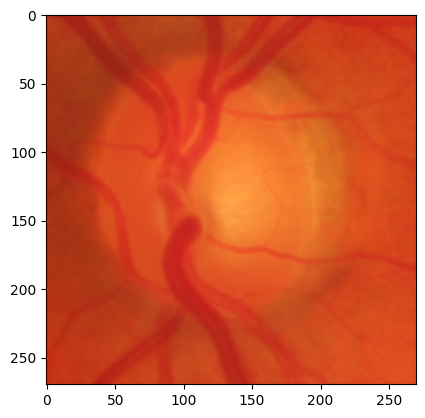

In [5]:
plt.imshow(roi)

In [6]:
green = roi[:,:,1]

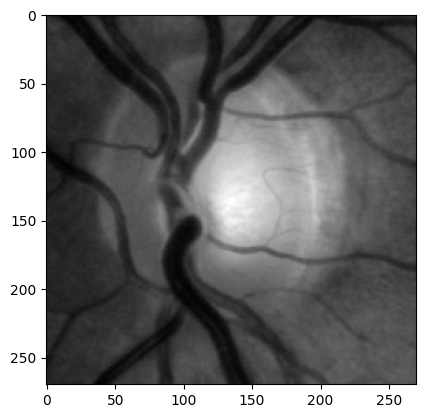

In [7]:
plt.imshow(green, 'gray')

In [8]:
greenbl = cv2.GaussianBlur(green.copy(), (19,19),0)

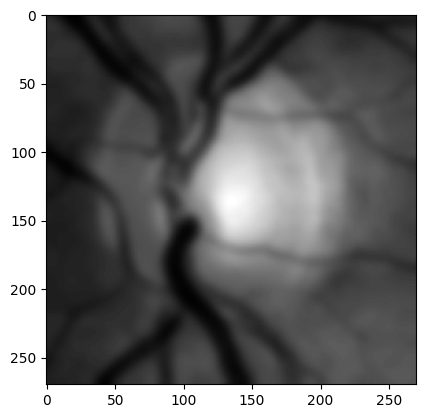

In [9]:
plt.imshow(greenbl, 'gray')

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (int(greenbl.shape[0]/25), int(greenbl.shape[1]/25)))

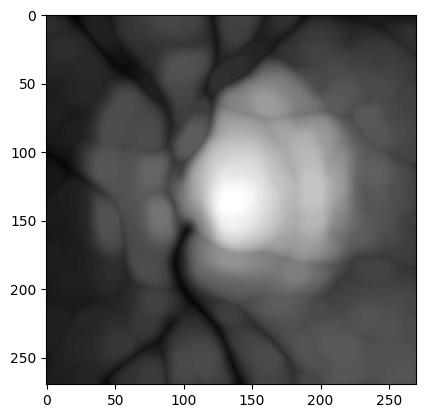

In [21]:
dilate = cv2.dilate(greenbl.copy(), kernel) # was 19,19
plt.imshow(dilate, 'gray')

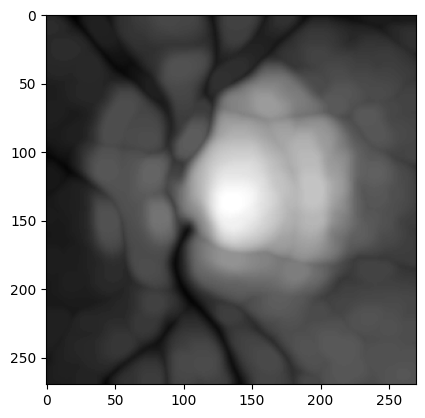

In [22]:
erosion = cv2.erode(dilate.copy(), (int(greenbl.shape[0]/5), int(greenbl.shape[1]/5)))
plt.imshow(erosion, cmap='gray')

In [23]:
ret4,th4 = cv2.threshold(dilate.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

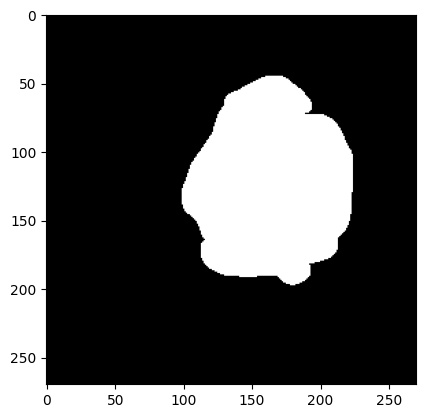

In [24]:
plt.imshow(th4, 'gray')

In [70]:
kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (greenbl.shape[0]//20, greenbl.shape[1]//20))
bukadikit = cv2.morphologyEx(greenbl.copy(), cv2.MORPH_OPEN, kernel_open)

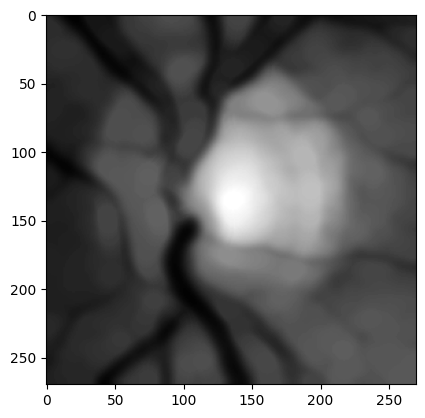

In [71]:
plt.imshow(bukadikit, cmap='gray')

In [72]:
ret4,th4 = cv2.threshold(bukadikit.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

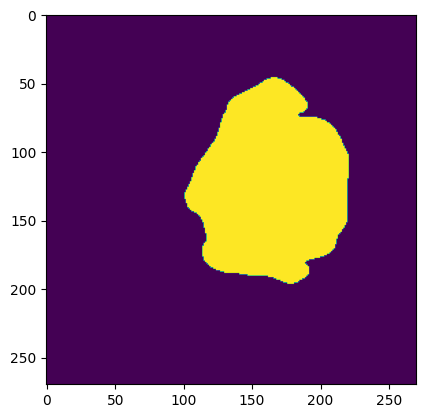

In [73]:
plt.imshow(th4)